# Introduction to Matplotlib. Part 1

Welcome. This is the first part of the Data Visualization with Matplotlib Workshop. This is a two parts workshop. In this first part, we will go through the basics of Matplotlib. Tomorrow, we will apply what we learned today to create different kinds of plots.

<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebook. This kind of boxes provide more technical details on what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

Let us start with importing some useful packages. We will be working with three packages: **numpy** , **pandas** and **matplotlob**. The main focus will be on matplotlib and data visualization, but numpy and pandas are great packages to handle data.

In [ ]:
import numpy as np
import pandas as pd

### DataFrame and Array

You may have noticed: we did not import matplotlib all. We will in a minute. First, let us spend some time introducing the data containers we will use: numpy *array* and pandas *DataFrame*. 

#### Array

Numpy _array_ is a flexible data structure to store (mostly) numerical data. If you have ever encountered linear algebra, you can compare an _array_ to a matrix or a vector. As for vectors and matrices, you can refer to elements within an _array_ using indices. Like vectors and matriceds, an array has a defined dimension.

In [ ]:
# Let's explore np.array()
# Start with random numerical data in a list
dt = [1,2,3,4]
# Convert
dt = np.array(dt)
print(f'Our new array: {dt}')
print(f'This is the dimension of the array: {dt.shape}') 
print(f'This is the third element of the array: {dt[2]}')

# More interesting, a 2-dimensions array -- a.k.a. matrix
# We can pass a list of lists. Numpy will interpret them as rows 
# If properly dimensioned
dt = [[1,2,3,4], [4,5,6,7]]
dt = np.array(dt)
print(f'Our new array:\n {dt}')
print(f'This is the dimension of the array in the (rows, columns) form: {dt.shape}') 
# So far so good, but check the selection.
print(f'This is the first row, third column element of the array: {dt[0, 2]}')
print(f'This is the second row, second column element of the array: {dt[1, 1]}')

We will use _array_ mostly to store data and manage axes (see below). But I should mention that numpy is a truly great library. Along with its expansion _scipy_ it is at the basis of most data-analysis tools in Python: you can use it for linear algebra, numerical recipes, optimization and much much more.

<div class="alert alert-block alert-success">
    <b>Back to the Basics</b>: Matplotlib and Pandas are no exceptions to the rule: both are constructed on top of numpy. Indeed, matplotlib internally converts all to-be-plotted data into numpy array -- even Pandas Series or built-in lists!
</div>


#### DataFrame

The other data container is the DataFrame from Pandas. A DataFrame can also be thought of as a 2-dimensional matrix. Like an array, it has a fixed dimension. However, it can contain all sort of different data-types and it has names for both columns and rows. From this perspective, a DataFrame is very close to a spreadsheet (or R data.frame).

<div class="alert alert-block alert-success">
    <b>Introduction to Pandas</b>: Exactly like numpy, Pandas is a vast and powerful library. For a more complete introduction to Pandas, you can check my previous workshop <a href="https://github.com/non87/GeoPandas-Workshop/blob/master/workshop1_colaboratory.ipynb">Introduction to GeoPandas, Part I</a>. The notebook contains an in-depth tutorial about Pandas DataFrame and Series. 
    </div>

In [ ]:
# Read the name data from a csv
names = pd.read_csv('national_reduced.csv')
# Look at the column names and data type
print(f'{names.info()}')
# Select only one column
print(f'\n\nThis is the Name column: {names["Name"]}')
# Select all rows for the name 'Ruth' using the .loc operator
print(f'\n\nThe Ruth data:\n{names.loc[names["Name"] == "Ruth", :]}')

Pandas is a great library for data handling. In this workshop, we will not be focusing on it, though. However, we will use it from time to time select relevant rows, group data, etc. Previous exposure to Pandas is useful to understand those lines of code. In any case, the exercises will not be based on Pandas and I will limit the use of Pandas method to the bare minimum.

<div class="alert alert-block alert-success">
<b> US Baby Names </b>: The name data we just loaded contains information about first names' use in the US from 1965 to 2014. Originally, the data is distributed by the Social Security Administration. It contains the frequency and associated Gender for all names given to newborns in the US in any given year from from 1880 -- conditional on the name being used at least 5 time in that year. I downloaded the original data from <a href="https://www.kaggle.com/kaggle/us-baby-names/data?select=NationalNames.csv">Kaggle</a> and only selected years later than 1965 (extreme included).
        </div>

### All You Need is One or More Axes, and Everyone Is an Artist

Finally, it is time to dive into matplotlib. Let us start with importing. Here we immediately encounter our first difficulty: this is a notebook. and Matplotlib has a peculiar behaviour inside notebooks. It is time to introduce the idea of _backend_ and how matplotlib manages its _backend_ differently inside a notebook. Unfortunately, we have to discuss this before importing matplotlib, because this has to be set immediately. Don't worry, everything will get less technical and more practical from here!

#### Backend

Quoting from the matplotlib official documentation (https://matplotlib.org/faq/usage_faq.html#what-is-a-backend):


>The “frontend” is the user facing code, i.e., the plotting code, whereas the “backend” does all the hard work behind-the-scenes to make the figure. There are two types of backends: user interface backends (for use in pygtk, wxpython, tkinter, qt4, or macosx; also referred to as “interactive backends”) and hardcopy backends to make image files (PNG, SVG, PDF, PS; also referred to as “non-interactive backends”).


In other words, a backend transforms code into a figure. There are different options to do this, with the main difference being between the hard and the interactive modes. Indeed, a backend will either save the final product on a file (_hard backend_), such as a png file, or show you the plot on screen (_interactive backend_). 

Matplotlib is smart and will select a working backend for you. Therefore, you will hardly ever notice -- especially if you just want to save a figure. However, it is important we check how backends work because the code you write and the behavior of matplotlib will change implictly depending on how you are running your code (notebook, live coding or script). To write code that reliably produces the results you want, knowing the basics of matplotlib backends is fundamental. For example, how do we translate notebook code to script code?

In [ ]:
# First we import matplotlib
import matplotlib
matplotlib.use('QT5Agg')
import matplotlib.pyplot as plt
# Then we choose the backend with the function .use()
# We choose the interactive backend QT5Agg (a good choice most of the time)
# Print the current backend
print(f"This is the current backend: {matplotlib.get_backend()}")
# *The* Fundamental Line of matplotlib
fig, ax = plt.subplots()
# Tell the interactive backend to plot the figure (not much to be seen here)
fig.show()

Now, as is often the case, we will use a sub-module within matplotlib named ```pyplot``` , which collects high-end function for plotting -- this will make more sense in a minute. This is the basic syntax we will use throughout the workshop:
```
fig, ax = plt.subplots()
```
I call this _The Fundamental Line_. We we will soon learn what it does in more details. For now, let's just say it starts a plot. Let's see what happens with different backends. Let's try the same exact line but with the default jupyter notebook backend (`inline`) -- at  least, this is the default in my installation of Jupyter, it is possible that different versions have different default. To do this we will use the <a href="https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained">magic functions</a> of Ipython (official name!). These lines substitute the cumbersome call to the `matplotlib.use()` function.

Conveniently, this backend will make the plot appears within the output of the code cell. As a downside, this backend is not really interactive in the same way that `Qt5Agg` and others are. When you use `inline` you have to write all the plotting code in one cell and you cannot modify the plot once it has been created. Truly interactive backends like `Qt5Agg` (and others) allows you to check what you are doing while you do it. The general rule for plotting in notebooks is "One block one plot". Depending on your coding style this may or may not be a big deal. 

In [ ]:
# Change the backend to a notebook specific backend.
%matplotlib --list
%matplotlib inline
# Print the current backend
print(f"This is the current backend: {matplotlib.get_backend()}")
# *The* Fundamental Line of matplotlib
fig, ax = matplotlib.pyplot.subplots()
# Tell the interactive backend to plot the figure (not much to be seen here)
fig.show()

You can notice matplotlib is complaining about the use of ```fig.show()```, which we did not see with the Qt5Agg backend. Moreover, the plot now appears below the code.

Naturally, there are plenty of options for  backends and you can use `Qt5Agg` even in a notebook, as you just saw. There also plenty of options specific to the notebook environment. We saw`inline`, let's see `nbagg`. 


<div class="alert alert-block alert-success">
    <b>Interactive Backends in a Notebook</b>: To use the notebook specific backends widget, ipympl and notebook, you will need to install the package ipympl. When working, these backends are fully interactive backends designed specifically for a notebook environment. But you may have to install nodejs as well to have it fully working.
    </b>

In [ ]:
%matplotlib nbagg

print(f"This is the current backend: {matplotlib.get_backend()}")
# *The* Fundamental Line of matplotlib
fig, ax = matplotlib.pyplot.subplots()

#### Axes

Why did we need to talk about backends before talking about _The Fundamental Line_ of matplotlib? As you can guess from its name, _The Fundamental Line_ is more important than backends. However, the backend must be set before importing `pyplot`. It turns out the magic line of Ipython works around this problem somehow (but no guarantees they will always work). However, we still had to set the backend to `QT5Agg` as first thing -- since we needed `pyplot` to run _The Fundamental Line_.

Indeed, since most of the plotting code is based on the `pyplot` sub-module, it is absolutely common to not even import the rest of matplotlib. Naturally, you will not get access to all of matplotlib functions, but you may not need them all. However, once pyplot is imported, it is problematic (sometime impossible) to further change the interactive backends using the `matplotlib.use()` function. As the documentation explains, "Matplotlib may fail to switch the backend and raise an ImportError".

In [ ]:
# Just reiterating what we did above.
# Let us follow this time-honored tradition of importing pyplot as plt
import matplotlib.pyplot as plt
# The new form of The Fundamental Line, notice the plt
fig, ax = plt.subplots()
# What are fig and ax?
print(f'fig is of type {type(fig)}')
print(f'ax is of type {type(ax)}')

The Fundamental Line is a call to `plt.subplots()`. The call returns two objects. First, a `Figure` object;  Second an `Axes` object. The `Figure` object is like a container where you put all that you plot. It has parameters such as the _dpi_ (dot per inch) or _figsize_ regulating the size of the entire plot. The `Axes` is like a canvas, on which you can paint. (Almost) Everything you do when you plot is drawing onto of your `Axes`. A Figure can have more than one `Axes`, but an `Axes` is always attached to a `Figure`.

In [ ]:
# Let's create a bigger Figure with more than one Axes 
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (5, 10))
# What kind of objects are fig and ax now?
print(f'fig is of type {type(fig)}')
print(f'ax is of type {type(ax)}')
# Access one Axes from the regular grid
print(f'This is the (1,1) Axes: {type(ax[1,1])}')

If you specify a dimension -- 3 rows, 2 columns, in our case --`plt.subplots()` creates a grid of `Axes` and store each individual `Axes` inside a numpy `array`. This is the reason we introduced the `array` above.  To access any individual `Axes` we use selection on the `array`, as seen above. This is not the only way to create an multiple `Axes` in the same figure, but we will use for the remaining of this workshop.

<div class="alert alert-block alert-success">
    <b>Multiple Axes in One Figure</b>: The dispositon of Axes within a Figure is very flexible. Matplotlib has different function for the creation of Axes with different sizes and different position inside the Figure. We saw plt.subplots() to create a regular grid of Axes. Other relevant functions are add_subplot(),  <a href="https://matplotlib.org/3.3.0/gallery/userdemo/demo_gridspec01.html#sphx-glr-gallery-userdemo-demo-gridspec01-py">subplot2grid()</a>. <a href="https://matplotlib.org/3.1.1/tutorials/intermediate/gridspec.html">gridspec()</a> and the sub-module <a href="https://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html">AxesGrid</a>
</div>
            
It is unlikely that you want to learn matplotlib in order to create regular grid of empty white plots. So, let's start to populate our `Axes`. Before plotting the data, we will examine those elements that are common to all kinds of plot. This figure, once again from matplotlib official documentation, shows the main elements of each `Axes`.

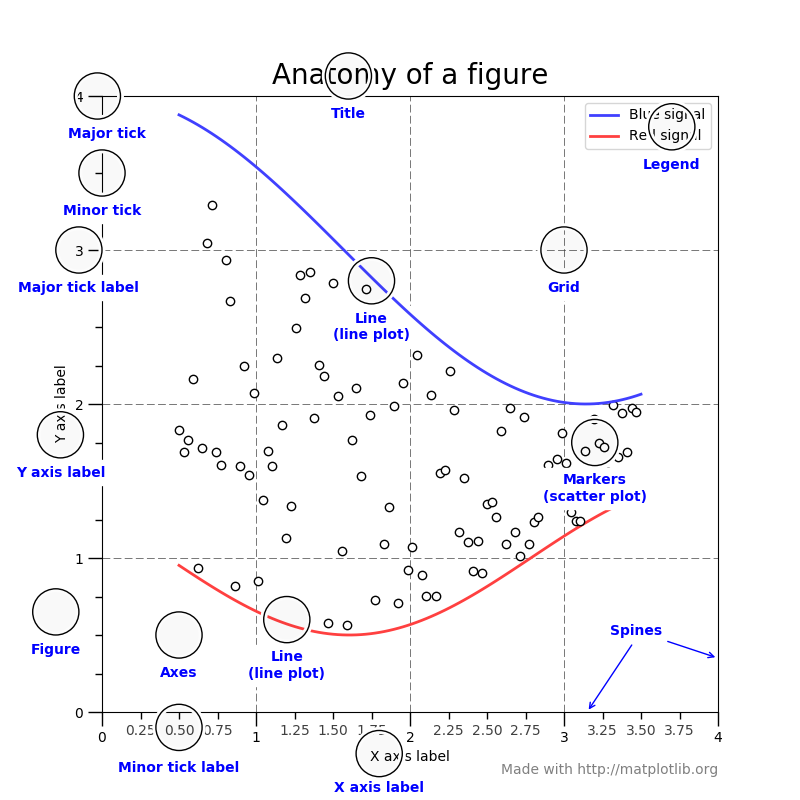

Let's start changing some of these parameters. They all are represented in the form of objects that each `Axes` contains -- like an x `axis` object and a y `axis` object. By the way, it is a good time to point out that `Axes` and `axis` are ***completely*** different things. We will learn in a second that these objects (like `axis`) belong to the general `Artist` class. However, in order to modify these settings, it is often not convenient to directly access any of the `Artist` that an `Axes` contains and change it -- we will learn how to do this anyway. Most of the time, it is quicker to call a "setter" method of the `Axes` object and let it modify things for you.  Even the official documentation admits that having "setter" methods is not great coding -- python has better ways to do this. Perhaps the syntax will change slightly in the future. But it will do for now. Let's see the most common settings for our `Axes`.

In [ ]:
# Let's create a simple one-axes figure
fig, ax = plt.subplots(figsize=(10,7))
# Change the title
ax.set_title("Hello World", fontsize=20)
# Change the x-axis
ax.set_xlim([0,10])
ax.set_yticks([-.7, -.5, .5])
ax.set_xlabel("The x-axis, from 0 to 10")
# Set the yticks as well. A little more complex
ax.set_ylim([-1,1])
ax.set_yticks([-.7, -.5, .5])
ax.set_yticklabels(["a", 'b', 'c'], fontsize=14)
ax.set_ylabel("Irregular ticks with letter names", fontsize = 12)
# Show the grid
ax.grid()

Let's continue playing with paramaters a little. Here, I modify the grid appearance. I also move the tick from bottom to top and from left to right. Finally, I do not plot the left and bottom spines.

In [ ]:
# Let's create a simple one-axes figure
fig, ax = plt.subplots()
# Let's color grids and ticks
ax.grid(color='red', linestyle='-.', linewidth=0.6)
# Makes tick longer and more separated from labels. Rotate labels 45 degrees
ax.tick_params(length=7, pad=16, labelrotation=45)
# Spines separate the data area of the plot from the rest
# Do not plot bottom ticks and spines
ax.spines['bottom'].set_visible(False)
# Do not plot left spines
ax.spines['left'].set_visible(False)
# Therefore we need to move ticks up!
ax.xaxis.set_ticks_position('top')
# But make the right very visible
ax.spines['right'].set_linewidth(4)
# Don't put the yticks at all
ax.yaxis.set_ticks_position('right')

##### Your Turn

Create two subplots in the same row. Name the yaxis and xaxis of both subplots "x" and "y", respectively. Set the ylim of the first plot from -100 to 100. Set the xlim of the second from -100 to 100. Turn on the grid. Title the first "Long Y", title the second "Long X". This shows

In [ ]:
# Create two subplots in one row using The Fundamental Line

# ylim from -100 to 100
ax[0]
# grid
ax[0]
# title Long Y
ax[0]
# xlim to -100 to 100
ax[1]
# grid
ax[1]
# title Long X
ax[1]

The bottom line of the exercise is that, by default, the x and y-axis can have wildly different scales. By default this is what happens. Before finally starting plotting data, let's check few tricks that may be useful, like putting the axis on the same scale, using a logarithm scale, creating one overall title for the entire plot, and modifying the vertical (and horizontal) distance between subplots.

In [ ]:
# Create a figure with one Axes
fig, ax = plt.subplots(nrows=2, figsize=(10,5))
# Double the span of x
ax[0].set_xlim(-1,1)
# Put the aspect to 'equal'
ax[0].set_aspect('equal')
# Now logarithmic scale
# 10-times the span of y
ax[1].set_ylim(1,100)
ax[1].set_yscale("log")
# Set the aspect to equal again
# Now the axes is twice as tall as wide
ax[1].set_aspect('equal')
# Put the title to both axes
ax[0].set_title('Linear Scale')
ax[1].set_title('Logarithmic Scale')
# Put an overall title
# Notice, this is a method for the fig object, since fig contains everything
fig.suptitle("Different scales", fontsize=23)
# By default, the vertical distance between the two subplots will result in some overlap
# Let's make it larger. As a side notice, the scale of the hspace (or wspace) is a little strange
# "The height of the padding between subplots, as a fraction of the average axes height"
# In practice, it takes some trial and error to find a good value.
# BTW, another fig method
fig.subplots_adjust(hspace=.4)

#### Artists

Technically, almost everything we use is an `Artist`. In matplotlib technicalities, an `Artist` is an object that knows how to interact with the backend in order to leave signs on the final figure. Since we have already left various traces in our output, you may corrrectly guess that `Axes`, `Figure`, `axis`, etc. are themselves an `Artist`. This is technically correct, but they are a special kinds of artist, who themselves contain other instances of `Artist`. We can check the properties of any artist with the function `getp()`. Let's do this on a `Figure` object.

In [ ]:
# We are not interested in actually seeing the figure now. We use .ioff() to turn off plotting
plt.ioff()
fig, ax = plt.subplots()
# .getp() will show you the properties of an artist
print(matplotlib.artist.getp(fig))
print(f'\n\nThese are the Axes of fig:\n{fig.get_axes()}')
print(f'\n\nThese are the Axes of fig:\n{fig.get_children()}')

Two noticeable feature. `fig` has an _axes_ property: a list of `Axes`. By now, you will not be surprised to know that it contains the `ax` object we created alongside `fig`. Second, `fig` also has a _children_ property. This is another list. It contains all `Artist` objects that `fig` contains. We can see it contains a `patches.Rectangle` object alongside `ax`. Let's check it out and play with it a little.

In [ ]:
# Turn on plot again
plt.ion()
fig, ax = plt.subplots()
# Select the rectangle as the first element in the children list
rect = fig.get_children()[0]
print(f'This is the rectangle:\n{rect}\n\n')
# Let's check the properties of the rectangle as well
print(matplotlib.artist.getp(rect))
# We see it has a facecolor (or fc) property. It contains the RGBA coordinates of a color (white in this case)
# Let's check out what happens when we change it to grey, RGBA coor. = (0.5, 0.5, 0.5, 1)
# To change the coordinate we use the functon .setp()
# .setp() is the setter brother of getp(), it allows you to set the properties of an artist
plt.setp(rect, facecolor=(0.5, 0.5, 0.5, 1))
# A thing of beauty!

It turns out `rect` is a rectangle covering the entire surface of `fig` -- albeit in the background. Changing the color of `rect` will change the background color. This is the kind of process happenning behind the scene when we use methods such as `Axes.set_title()`, seen above. However, this is a minor point. This small example showed us two things:

 - As you just saw, `Figure` is a special kind of `Artist`: it is a container for other `Artist` objects. The same goes for `Axes` (itself contained by a `Figure`) and the two `axis` (themselves contained by an `Axes`). They contain other `Artist` who will then leave traces on the output.
 
 - You can be as analytical you want in the way you draw on screen. Indeed, there are different levels of specificity you can use to achieve the same result. Think about this as the difference between asking matplotlib to draw a histogram (we will soon know how) and calculating the height of each bin and then ask matplotlib to draw rectangles of a certain height. For the sake of your own time, you will want to use the functions at the highest level possible while still achieving what you are striving for (or something close enough:) ).
 
About the first point, to help conceptual clarity I will use the word `Artist` to refer to those objects that actually leave a trace on the output.

About the second point, the rest of this workshop will be dedicated to the exploration of various `Artist`, which will help you draw standard plots such as scatter plots, heatmaps or histograms.

##### Colors

Small and fundamental aside about colors. We have set the color of `rect` to gray using the curios `tuple` (0.5, 0.5, 0.5, 1). Matplotlib interprets this as an RGBA coordinate. Let's examine what this means. The first three number are the amount of red (R), green (G) and blue (B) in the color -- white, black and all gray colors in between have a equal mixture of these primary colors. The fourth value is the so-called _alpha_ value. It determines the transparency of the color. An _alpha_ of 0 corresponds to completely transparency (that is, an invisible object). An _alpha_ of 1 corresponds to a completely solid object. Anything in between will create a semi-transparent object. 

Alongisde RGBA coordinates, matplotlib accepts other ways to specify colors. You can find more details in the documentation (<a href=https://matplotlib.org/3.2.2/gallery/color/color_demo.html>https://matplotlib.org/3.2.2/gallery/color/color_demo.html</a>). In this workshop, we will only use RGBA coordinates and color keywords -- see <a href=https://matplotlib.org/3.2.2/gallery/color/named_colors.html>here</a> for a complete list of color keywords.

<div class="alert alert-block alert-success">
    <b>Color Models</b>: The RGBA coordinate color scheme is in no way the only possible way to create a reference system for colors. Other popular options are the <a href=https://en.wikipedia.org/wiki/HSL_and_HSV>Hue-Saturation-Light model</a>, the <a href=https://en.wikipedia.org/wiki/HSL_and_HSV>Hue-Saturation-Value system</a>, the <a href=https://en.wikipedia.org/wiki/Web_colors>hexadecimal model</a>, the <a href=https://en.wikipedia.org/wiki/CMYK_color_model>Ciano-Magenta-Yellow-Black model</a> and the <a href=https://en.wikipedia.org/wiki/CIELAB_color_space>CIELAB model</a>. Each model emphasizes a different characteristics of colors and it is helpful in its own way. Matplotlib supports the Hue-Saturation-Value system in its sub-module color.
    </div>

#### Try it

Any `Axes` object has a background rectangular patch exactly as the rectangular patch `Figure` contains. Try to change its color to "red" or, in RGBA coordinates, `(1, 0, 0, 1).` 

In [ ]:
# Create the figure and axes using The Fundamental Line
fig, ax = plt.subplots()
# Get the axes properties. You will notice there is a children list (exactly as in Figure)
print(matplotlib.artist.getp(ax))
# The rectangular patch we look for is the last in the children list
rect = ax.get_children()[-1]
# use plt.setp() Set the color to red
plt.setp(rect, facecolor=(1, 0, 0, 1))

### Plotting Data

It is finally time to get busy plotting some data. We will use the name dataset introduced above in this section. This is the last element of the anatomy of a plot picture seen above. We start with a simple question: is the name "Barack" getting more popular since 2008 -- the year Obama was first elected as President of the United States?

<div class="alert alert-block alert-success">
    <b>Different Styles</b>: Matplotlib was originally inspired by MATLAB plotting style. The sub-module Pyplot is originally intended to provide a MATLAB plotting experience within the Python environment. However, this is not the only way to use Matplotlib. It is possible to use matplotlib in a more pythonic, Object-Oriented (OO) style. Such OO style is what we will use in the workshop, as reccomended. As we shall see, it is mostly based on calling helper nethods of the Axes class. For an overview of the MATLAB plotting style, see <a href="https://matplotlib.org/tutorials/introductory/pyplot.html">this tutorial</a>.
    </div>

In [ ]:
# First let's create the data we will plot. This is about pandas. Don't worry too much
# We convert to numpy for safety, but it is not necessary to be fair to pandas
# barack data
barack = names.loc[names["Name"] == "Barack", :]
# Number of newborns named barack in the years.
# This sum the two genders into one cell and only retain years where there are enough Baracks
barack = barack.groupby(['Year']).sum()
# Relevant years
years  = barack.index.to_frame()['Year'].to_numpy()
# This will get us the values to be plotted
barack = barack['Count'].to_numpy()
print(f'This is the input in the y-axis: {barack}' )
# Our first plot.
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
ax.plot(years, barack)
# Usual settings, we saw this above
ax.set_title('The Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Obama"')
# Now correlation is not causation, but c'mon
# Select female or male
# print(ronald.index.get_locs('M'))

Ok, let's learn few tricks. First, let's set non-default linetype, linewidth and color for the data we plot. Second, let's add two new elements to the plot. A vertical line signalling when Obama won the 2008 Super-Tuesday nomination and another line signaling when Obama won the election. We use the `Axes` method `axvline()` to draw the vertical lines.

In [ ]:
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
# We choose the keyword color darkgreen, a different linestyle and a thicker tract
ax.plot(years, barack, color='darkgreen', linestyle="-.", linewidth=3)
# Usual settings, we saw this above
ax.set_title('The Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Obama"')
# To create a vertical line we need to calculate where to put it.
# Supertuesday was at the beginning of Feb. 2008
super_tuesday = 1/12 + 2008
# Election was at the beginning of Nov. 2008
election = 10/12 + 2008
# Create the two vertical lines. We make them less noticeable with stylistic choices
# Super-Tuesday
ax.axvline(x=super_tuesday, color=(0.5,0.5,0.5,1), linewidth=1.3, linestyle="--")
# election 
ax.axvline(x=election, color=(0.5,0.5,0.5,1), linewidth=1.3, linestyle="--")

This is the general principle we will follow: to plot data you call methods of the `Axes` object. Following the same principle, we can plot and compare different data in the same `Axes`. Let's compare the "Obama" effect with the "Reagan" effect on first names. To make things more readable, we will drop the super-Tuesday line (but we will left election lines) and we will add a legend.

In [ ]:
# First, let's create the data for Ronald. Substantially, the same lines as before
ronald = names.loc[names["Name"] == "Ronald", :]
# Relevant years
ronald = ronald.groupby(['Year']).sum()
years_ronald = ronald.index.to_frame()['Year'].to_numpy()
ronald = ronald['Count'].to_numpy()
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
# Usual settings, we saw this above
ax.set_title('Reagan Vs. Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named as the President')
# To create a vertical line we need to calculate where to put it.
# 2008 Election was at the beginning of Nov. 2008
election_2008 = 10/12 + 2008
# 1980 Election was at the beginning of Nov. 1980
election_1980 = 10/12 + 1980
# Draw the two vertical lines.
ax.axvline(x=election_2008, color=(0, 0, 1, 0.5), linewidth=1.3, linestyle="--")
# election 
ax.axvline(x=election_1980, color=(1, 0, 0,1), linewidth=1.3, linestyle="--")
# Notice the argument label!
ax.plot(years_ronald, ronald, color='red', linestyle="-.", linewidth=3, label = 'Reagan')
ax.plot(years, barack, color='blue', linestyle="-.", linewidth=3, label = 'Obama')
# Now the legend
ax.legend(loc='upper right')

Even if this is no scientific proof, I would suggets there is no Reagan effect, even if there may be an Obama effect. Let's end the plot with some little final touches. We will put it on a log scale -- as you will see, makes everything clearer. We will also use another _style_. A _style_ is a coherent series of stylistic choices for your plots. When you switch _style_ , you change many default settings of matplotlib all at once. For example, you may change the default font for the axis labels and titles while also setting the grid to be always present. Finally, we will save the plot in an external file -- using a hard-backed! We should be proud of our plot.

Newborns named after presidents looks like a kind of topic you can find on <a href="https://fivethirtyeight.com/">fivethirtyeight.com</a>. So we will use their style, which is readily available in matplotlib pre-installed library of styles. It goes without saying, you can <a href="https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html">create and save your own style</a> or download styles from the internet.

In [ ]:
print(f"These are the available styles in your matplotlib:\n{plt.style.available}\n\n")
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize= (10,8))
# Usual settings, we saw this above
ax.set_title('Reagan Vs. Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named as the President')
# Draw the two vertical lines.
ax.axvline(x=election_2008, color=(0, 0, 1, 0.5), linewidth=1.3, linestyle="--")
# election 
ax.axvline(x=election_1980, color=(1, 0, 0,1), linewidth=1.3, linestyle="--")
# Notice the argument label!
ax.plot(years_ronald, ronald, color='red', linestyle="-.", linewidth=3, label = 'Reagan')
ax.plot(years, barack, color='blue', linestyle="-.", linewidth=3, label = 'Obama')
# Now the legend
ax.legend(loc='upper right')
# Change y-scale
ax.set_yscale("log")
# Save it
# These are the available file-formats (they are less than you may expect)
fig.canvas.get_supported_filetypes()
# We use the well-known png format.
plt.savefig('like_nate.png', dpi=200)
# Go back to default style
plt.style.use('default')

#### Now You: Nancy Vs Michelle

My advisor really loved the Obama vs. Reagan Effect plot. Now, she wants to see if there is anything like a first-lady effect. Let's compare the number of newborns named like Nancy Reagan and Michelle Obama overtime. A small twist, my advisor really wants me to use `R`. No way. I will just use the "ggplot" style of matplotlib, that makes your plots looks like they were created using _ggplot2_ in `R`.

First let us create the data to plot. This is really just pandas. Don't worry.

In [ ]:
# Create the relevant data using pandas.
# Nancy data
nancy = names.loc[names["Name"] == "Nancy", :]
# Relevant years
nancy = nancy.groupby(['Year']).sum()
years_nancy = nancy.index.to_frame()['Year'].to_numpy()
nancy = nancy['Count'].to_numpy()
# Michelle data
michelle = names.loc[names["Name"] == "Michelle", :]
# Relevant years
michelle = michelle.groupby(['Year']).sum()
# print(ronald.index.get_locs('M'))
years_michelle = michelle.index.to_frame()['Year'].to_numpy()
michelle = michelle['Count'].to_numpy()

The variable `michelle` now contains the number of newborns named 'Michelle' in the US in each year. The variable `nancy` contains the number of newborns named 'Nancy' in the US in each year. The variables `years_michelle` and `years_nancy` contain the relevant years for `michelle` and `nancy`, respectively.

Now, use these data to create a plot similar to the Reagan Vs Obama Effect Plot above. Let's also save the plot.

In [ ]:
# Don't forget to use the style 'ggplot', otherwise my advisor will get me
plt.

fig, ax = plt.subplots(figsize= (10,8))
# Find a good title and put it on the plot
ax.
# Set the x label to 'Year'
ax.
# Set the y label to Number of newborns named as the First Lady
ax.
# Draw the two vertical lines. They x value for them is still saved 
# in the two variables election_2008 and election_1980
ax.
# election 
ax.
# Plot the Nancy data. Don't forget the label!
ax.
# Plot the Michelle data. Don't forget the label!
ax.
# Now create a legend
ax.
# Change y-scale to "log"
ax.
# Save it as 'first_lady.png'
plt.